ANALYSE DER GELABELTEN TRAININGSDATEN

📊 DATENSATZ ÜBERSICHT:
   Gesamtanzahl Datenpunkte: 10,853
   Zeitraum: 2024-05-01 00:00:00+00:00 bis 2025-05-20 15:15:00+00:00
   Anzahl Spalten: 15

🚨 ANOMALIE STATISTIKEN:
   Erkannte Anomalien: 565
   Anomalie-Rate: 5.21%
   Normale Datenpunkte: 10,288

🔍 ANOMALIE-TYPEN:
   Isolation Forest Anomaly: 543 (5.00%)
   Statistical Anomaly: 200 (1.84%)
   Domain Anomaly: 8 (0.07%)

🔄 ANOMALIE OVERLAP:
   Von mehreren Detektoren erkannt: 178
   Nur von einem Detektor erkannt: 387

📅 ZEITLICHE VERTEILUNG:
   Stunde mit meisten Anomalien: 15:00 (40 Anomalien)
   Stunde mit höchster Rate: 3:00 (11.3%)
   Tag mit meisten Anomalien: Sunday (132 Anomalien)

🌡️  TEMPERATUR STATISTIKEN:
   Normale Daten - Temperatur:
     Durchschnitt: 57.2°C
     Min: 47.8°C, Max: 62.8°C
   Anomalie Daten - Temperatur:
     Durchschnitt: 50.7°C
     Min: -2.1°C, Max: 71.5°C

🌙 TAG/NACHT VERTEILUNG:
   Nacht-Anomalien: 77 (6.19%)
   Tag-Anomalien: 488 (5.08%)


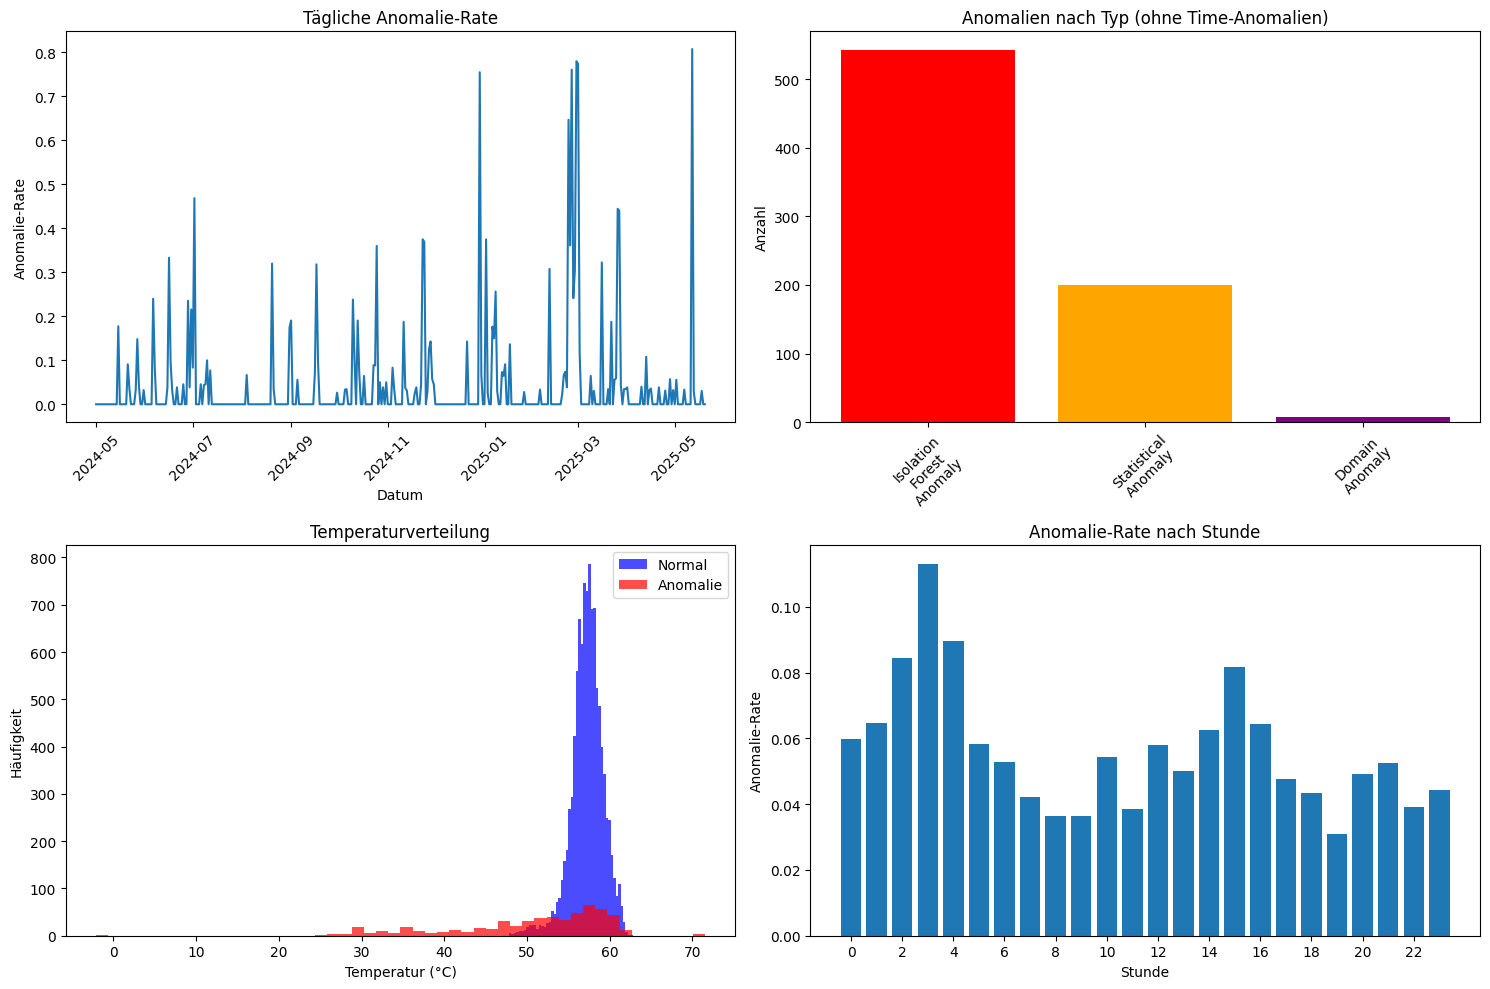

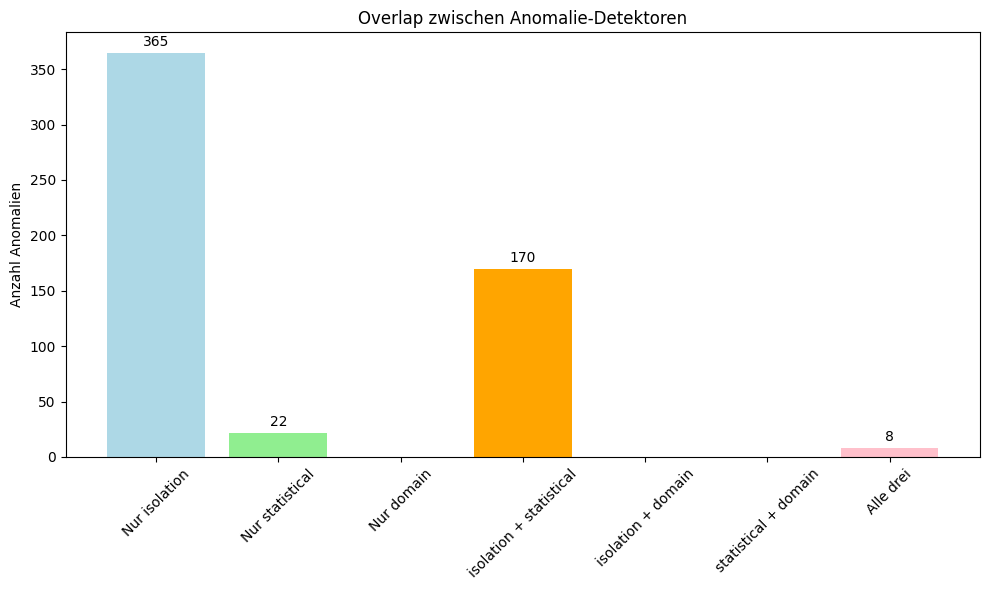


✅ Analyse abgeschlossen!
📁 Bereinigte Daten verfügbar: (10853, 18)
📊 Verfügbare Anomalie-Spalten: ['is_anomaly', 'anomaly_score', 'isolation_forest_anomaly', 'statistical_anomaly', 'domain_anomaly']


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_labeled_training_data(csv_path):
    """
    Analysiert die gelabelten Trainingsdaten - ohne Time-Anomalien
    """
    # Daten laden
    df = pd.read_csv(csv_path)
    
    print("=" * 60)
    print("ANALYSE DER GELABELTEN TRAININGSDATEN")
    print("=" * 60)
    
    # Grundlegende Informationen
    print(f"\n📊 DATENSATZ ÜBERSICHT:")
    print(f"   Gesamtanzahl Datenpunkte: {len(df):,}")
    print(f"   Zeitraum: {df['timestamp'].min()} bis {df['timestamp'].max()}")
    print(f"   Anzahl Spalten: {len(df.columns)}")
    
    # Anomalie-Statistiken
    print(f"\n🚨 ANOMALIE STATISTIKEN:")
    total_anomalies = df['is_anomaly'].sum()
    anomaly_rate = df['is_anomaly'].mean()
    
    print(f"   Erkannte Anomalien: {total_anomalies:,}")
    print(f"   Anomalie-Rate: {anomaly_rate:.2%}")
    print(f"   Normale Datenpunkte: {len(df) - total_anomalies:,}")
    
    # Aufschlüsselung nach Anomalie-Typ (OHNE time_anomaly)
    print(f"\n🔍 ANOMALIE-TYPEN:")
    anomaly_types = ['isolation_forest_anomaly', 'statistical_anomaly', 'domain_anomaly']
    
    for anomaly_type in anomaly_types:
        if anomaly_type in df.columns:
            count = df[anomaly_type].sum()
            rate = df[anomaly_type].mean()
            print(f"   {anomaly_type.replace('_', ' ').title()}: {count:,} ({rate:.2%})")
    
    # Overlap zwischen Anomalie-Typen (ohne time_anomaly)
    if all(col in df.columns for col in anomaly_types):
        print(f"\n🔄 ANOMALIE OVERLAP:")
        # Zähle wie viele Punkte von mehreren Detektoren erkannt wurden
        overlap_count = (df[anomaly_types].sum(axis=1) > 1).sum()
        print(f"   Von mehreren Detektoren erkannt: {overlap_count:,}")
        
        # Nur von einem Detektor erkannt
        single_detection = (df[anomaly_types].sum(axis=1) == 1).sum()
        print(f"   Nur von einem Detektor erkannt: {single_detection:,}")
    
    # Zeitliche Verteilung
    if 'timestamp' in df.columns:
        print(f"\n📅 ZEITLICHE VERTEILUNG:")
        df['datetime'] = pd.to_datetime(df['timestamp'])
        df['hour'] = df['datetime'].dt.hour
        df['day_of_week'] = df['datetime'].dt.day_name()
        
        # Anomalien nach Stunde
        hourly_anomalies = df.groupby('hour')['is_anomaly'].agg(['sum', 'mean']).round(3)
        print(f"   Stunde mit meisten Anomalien: {hourly_anomalies['sum'].idxmax()}:00 ({hourly_anomalies['sum'].max()} Anomalien)")
        print(f"   Stunde mit höchster Rate: {hourly_anomalies['mean'].idxmax()}:00 ({hourly_anomalies['mean'].max():.1%})")
        
        # Anomalien nach Wochentag
        daily_anomalies = df.groupby('day_of_week')['is_anomaly'].agg(['sum', 'mean']).round(3)
        print(f"   Tag mit meisten Anomalien: {daily_anomalies['sum'].idxmax()} ({daily_anomalies['sum'].max()} Anomalien)")
    
    # Temperatur-Statistiken
    if 'avg' in df.columns:
        print(f"\n🌡️  TEMPERATUR STATISTIKEN:")
        normal_temp = df[~df['is_anomaly']]['avg']
        anomaly_temp = df[df['is_anomaly']]['avg']
        
        print(f"   Normale Daten - Temperatur:")
        print(f"     Durchschnitt: {normal_temp.mean():.1f}°C")
        print(f"     Min: {normal_temp.min():.1f}°C, Max: {normal_temp.max():.1f}°C")
        
        if len(anomaly_temp) > 0:
            print(f"   Anomalie Daten - Temperatur:")
            print(f"     Durchschnitt: {anomaly_temp.mean():.1f}°C")
            print(f"     Min: {anomaly_temp.min():.1f}°C, Max: {anomaly_temp.max():.1f}°C")
    
    # Nighttime vs Daytime
    if 'nighttime' in df.columns:
        print(f"\n🌙 TAG/NACHT VERTEILUNG:")
        night_anomalies = df[df['nighttime']]['is_anomaly'].sum()
        day_anomalies = df[~df['nighttime']]['is_anomaly'].sum()
        night_rate = df[df['nighttime']]['is_anomaly'].mean()
        day_rate = df[~df['nighttime']]['is_anomaly'].mean()
        
        print(f"   Nacht-Anomalien: {night_anomalies:,} ({night_rate:.2%})")
        print(f"   Tag-Anomalien: {day_anomalies:,} ({day_rate:.2%})")
    
    # Visualisierungen erstellen
    create_anomaly_visualizations(df)
    
    return df

def create_anomaly_visualizations(df):
    """Erstellt Visualisierungen der Anomalie-Daten - ohne Time-Anomalien"""
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # 1. Anomalie-Rate über Zeit
    if 'timestamp' in df.columns:
        df['datetime'] = pd.to_datetime(df['timestamp'])
        df['date'] = df['datetime'].dt.date
        
        daily_anomalies = df.groupby('date')['is_anomaly'].mean()
        
        axes[0, 0].plot(daily_anomalies.index, daily_anomalies.values)
        axes[0, 0].set_title('Tägliche Anomalie-Rate')
        axes[0, 0].set_xlabel('Datum')
        axes[0, 0].set_ylabel('Anomalie-Rate')
        axes[0, 0].tick_params(axis='x', rotation=45)
    
    # 2. Anomalie-Typen Balkendiagramm (OHNE time_anomaly)
    anomaly_types = ['isolation_forest_anomaly', 'statistical_anomaly', 'domain_anomaly']
    
    type_counts = []
    type_labels = []
    colors = ['red', 'orange', 'purple']  # Entfernt: grün für time_anomaly
    
    for anomaly_type in anomaly_types:
        if anomaly_type in df.columns:
            type_counts.append(df[anomaly_type].sum())
            type_labels.append(anomaly_type.replace('_', '\n').title())
    
    axes[0, 1].bar(type_labels, type_counts, color=colors[:len(type_counts)])
    axes[0, 1].set_title('Anomalien nach Typ (ohne Time-Anomalien)')
    axes[0, 1].set_ylabel('Anzahl')
    axes[0, 1].tick_params(axis='x', rotation=45)
    
    # 3. Temperaturverteilung: Normal vs Anomalie
    if 'avg' in df.columns:
        normal_temps = df[~df['is_anomaly']]['avg']
        anomaly_temps = df[df['is_anomaly']]['avg']
        
        axes[1, 0].hist(normal_temps, bins=50, alpha=0.7, label='Normal', color='blue')
        axes[1, 0].hist(anomaly_temps, bins=50, alpha=0.7, label='Anomalie', color='red')
        axes[1, 0].set_title('Temperaturverteilung')
        axes[1, 0].set_xlabel('Temperatur (°C)')
        axes[1, 0].set_ylabel('Häufigkeit')
        axes[1, 0].legend()
    
    # 4. Stündliche Anomalie-Rate
    if 'timestamp' in df.columns:
        df['hour'] = pd.to_datetime(df['timestamp']).dt.hour
        hourly_rate = df.groupby('hour')['is_anomaly'].mean()
        
        axes[1, 1].bar(hourly_rate.index, hourly_rate.values)
        axes[1, 1].set_title('Anomalie-Rate nach Stunde')
        axes[1, 1].set_xlabel('Stunde')
        axes[1, 1].set_ylabel('Anomalie-Rate')
        axes[1, 1].set_xticks(range(0, 24, 2))
    
    plt.tight_layout()
    plt.show()
    
    # Zusätzliche Visualisierung: Anomalie-Typ Overlap
    create_overlap_visualization(df)

def create_overlap_visualization(df):
    """Erstellt Venn-Diagramm-ähnliche Visualisierung für Anomalie-Overlaps"""
    
    anomaly_types = ['isolation_forest_anomaly', 'statistical_anomaly', 'domain_anomaly']
    
    if not all(col in df.columns for col in anomaly_types):
        return
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    
    # Berechne alle Kombinationen
    combinations = {}
    
    # Einzelne Detektoren
    for i, anomaly_type in enumerate(anomaly_types):
        only_this = df[anomaly_type] & ~df[anomaly_types[:i] + anomaly_types[i+1:]].any(axis=1)
        combinations[f"Nur {anomaly_type.split('_')[0]}"] = only_this.sum()
    
    # Paarweise Kombinationen
    for i in range(len(anomaly_types)):
        for j in range(i+1, len(anomaly_types)):
            type1, type2 = anomaly_types[i], anomaly_types[j]
            remaining = [t for t in anomaly_types if t not in [type1, type2]]
            
            both = df[type1] & df[type2]
            if remaining:
                both = both & ~df[remaining].any(axis=1)
            
            label = f"{type1.split('_')[0]} + {type2.split('_')[0]}"
            combinations[label] = both.sum()
    
    # Alle drei zusammen
    all_three = df[anomaly_types].all(axis=1)
    combinations["Alle drei"] = all_three.sum()
    
    # Balkendiagramm
    labels = list(combinations.keys())
    values = list(combinations.values())
    
    bars = ax.bar(labels, values, color=['lightblue', 'lightgreen', 'lightcoral', 'orange', 'purple', 'gold', 'pink'])
    ax.set_title('Overlap zwischen Anomalie-Detektoren')
    ax.set_ylabel('Anzahl Anomalien')
    ax.tick_params(axis='x', rotation=45)
    
    # Werte auf Balken anzeigen
    for bar, value in zip(bars, values):
        if value > 0:
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(values)*0.01,
                   str(value), ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Analysiere die gelabelten Daten (ohne Time-Anomalien)
    csv_path = 'data/labeled_training_data_cleaned.csv'
    
    try:
        df = analyze_labeled_training_data(csv_path)
        print(f"\n✅ Analyse abgeschlossen!")
        print(f"📁 Bereinigte Daten verfügbar: {df.shape}")
        
        # Zeige verfügbare Anomalie-Spalten
        anomaly_cols = [col for col in df.columns if 'anomaly' in col]
        print(f"📊 Verfügbare Anomalie-Spalten: {anomaly_cols}")
        
    except Exception as e:
        print(f"❌ Fehler beim Laden der Daten: {e}")